In [18]:
import pandas as pd
import os
from ast import literal_eval
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# data cleaning

In [ ]:
files = [pd.read_csv(file, sep=';') for file in os.listdir() if file.endswith('.csv')]
df = pd.concat(files)

In [ ]:
df.drop_duplicates(subset='id', inplace=True)
df = df[df['is_practice_test_course']==False]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3706 entries, 0 to 377
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   _class                                  3706 non-null   object 
 1   id                                      3706 non-null   int64  
 2   title                                   3706 non-null   object 
 3   url                                     3706 non-null   object 
 4   is_paid                                 3706 non-null   bool   
 5   visible_instructors                     3706 non-null   object 
 6   image_125_H                             3706 non-null   object 
 7   image_240x135                           3706 non-null   object 
 8   is_practice_test_course                 3706 non-null   object 
 9   image_480x270                           3706 non-null   object 
 10  published_title                         3706 non-null   object 
 1

In [ ]:
df_cleaned = df[['id', 'title', 'url', 'is_paid', 'visible_instructors',
       'published_title', 'locale', 'headline',
       'num_subscribers', 'caption_locales', 'avg_rating', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests',
       'has_closed_caption', 'caption_languages', 'created',
       'instructional_level_simple',
       'content_length_practice_test_questions',
       'published_time', 'objectives_summary',
       'content_info_short']].dropna().copy()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19456 entries, 0 to 1269
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      19456 non-null  int64  
 1   title                                   19456 non-null  object 
 2   url                                     19456 non-null  object 
 3   is_paid                                 19456 non-null  bool   
 4   visible_instructors                     19456 non-null  object 
 5   published_title                         19456 non-null  object 
 6   locale                                  19456 non-null  object 
 7   headline                                19456 non-null  object 
 8   num_subscribers                         19456 non-null  int64  
 9   caption_locales                         19456 non-null  object 
 10  avg_rating                              19456 non-null  float64


In [ ]:
df_cleaned[['title', 'is_paid', 'headline', 'objectives_summary']]

title  is_paid  \
0                        Java Programming for Beginners     True   
1     Java Multithreading and Concurrency from Basic...     True   
2     C# Intermediate - Part II (Reflection, Events,...     True   
3                 Java Interview Questions With Answers     True   
4                     Python as a first coding language     True   
...                                                 ...      ...   
1265       SQL - Cours Complet - Apprendre SQL de A à Z     True   
1266  Impariamo da zero SQL con Oracle, SQL Server e...     True   
1267    Modelagem de Dados em Banco de Dados Relacional     True   
1268      Curso Completo de Bancos de Dados Relacionais     True   
1269            DBA Oracle Essencial - Aprenda do zero!     True   

                                               headline  \
0     Learn how to Code in Java with no previous exp...   
1     Java Multithreading, Java Concurrency and Para...   
2     Value and Reference Types, Generics, Reflectio...   
3     Java Interview Questions With Answers : Practi...   
4     Master programming skills using Python, a top ...   
...                                                 ...   
1265  SQL avec des Cas Pratiques. Apprendre à Interr...   
1266  Corso pratico completo  per creare query, prog...   
1267  Aprenda a criar bases de dados relacionais con...   
1268  Aprenda a trabalhar com os principais bancos d...   
1269  Tenha em mãos o essencial para administrar ban...   

                                     objectives_summary  
0     ["Download and Install the Eclipse IDLE the en...  
1     ['Differences between threads and processes', ...  
2     ['The different purposes of out, ref and in ke...  
3     ['You will understand what kind of questions a...  
4     ['Fundamentals of the Python language', 'How t...  
...                                                 ...  
1265  ['Installer MySQL et MySQL Workbench sur Mac e...  
1266  ['Codice SQL DML', 'Codice SQL DDL', 'Funzioni...  
1267  ['Entender os conceitos: entidade, atributo, t...  
1268  ['A como realizar a Modelagem Conceitual, Lógi...  
1269  ['Criar, dimensionar e gerenciar tablespaces',...  

[19456 rows x 4 columns]

In [ ]:
from sentence_transformers import SentenceTransformer

# Подходящая модель (быстрая и точная)
model = SentenceTransformer('all-MiniLM-L6-v2')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def create_embedding_from_description(row):
    description = row['title']+'. '+row['headline']+'. '+' '.join(row['objectives_summary'])
    description = description.lower()
    row['description_embedding'] = model.encode(description, show_progress_bar=False)
    return row

In [ ]:
from tqdm import tqdm
tqdm.pandas()

df_cleaned['description_embedding'] = ''
df_cleaned_with_embeddings = df_cleaned.progress_apply(create_embedding_from_description, axis=1)

100%|██████████| 19456/19456 [10:46<00:00, 30.07it/s]


In [ ]:
def create_embedding_from_instructor(row):
    description = '|'.join(row['instructor_jobs'])
    description = description.lower()
    row['instructor_embedding'] = model.encode(description, show_progress_bar=False)
    return row


df_cleaned_with_embeddings['instructor_embedding'] = ''
df_cleaned_with_embeddings = df_cleaned_with_embeddings.progress_apply(create_embedding_from_instructor, axis=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 19456/19456 [04:20<00:00, 74.73it/s] 


In [ ]:
df_cleaned_with_embeddings.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned_with_embeddings.to_csv('cleaned_with_embeddings.csv', sep=';', index=False)

In [19]:
df_cleaned_with_embeddings = pd.read_csv('cleaned_with_embeddings.csv', sep=';')
df_cleaned_with_embeddings['description_embedding'] = df_cleaned_with_embeddings['description_embedding'].apply(lambda x: [literal_eval(s.strip()) for s in x.replace('\n', '').strip('[]').split(',')])
df_cleaned_with_embeddings['instructor_embedding'] = df_cleaned_with_embeddings['instructor_embedding'].apply(lambda x: [literal_eval(s.strip()) for s in x.replace('\n', '').strip('[]').split(',')])
df_cleaned_with_embeddings

id                                              title  \
0      4949114                     Java Programming for Beginners   
1      6505271  Java Multithreading and Concurrency from Basic...   
2      5002136  C# Intermediate - Part II (Reflection, Events,...   
3      5227378              Java Interview Questions With Answers   
4      4952148                  Python as a first coding language   
...        ...                                                ...   
19451  2079420       SQL - Cours Complet - Apprendre SQL de A à Z   
19452  1394850  Impariamo da zero SQL con Oracle, SQL Server e...   
19453   375728    Modelagem de Dados em Banco de Dados Relacional   
19454  1745296      Curso Completo de Bancos de Dados Relacionais   
19455  1095516            DBA Oracle Essencial - Aprenda do zero!   

                                                     url  is_paid  \
0              /course/java-programming-for-beginners-w/     True   
1      /course/java-multithreading-and-concurrency-fr...     True   
2      /course/c-intermediate-part-ii-reflection-even...     True   
3         /course/java-interview-questions-with-answers/     True   
4                           /course/python-first-coding/     True   
...                                                  ...      ...   
19451  /course/sql-cours-complet-apprendre-sql-de-a-a-z/     True   
19452      /course/impariamo-sql-con-oracle-e-sqlserver/     True   
19453  /course/modelagem-de-dados-em-banco-de-dados-r...     True   
19454  /course/curso-completo-de-banco-de-dados-relac...     True   
19455                          /course/curso-dba-oracle/     True   

                                     visible_instructors  \
0      [{'_class': 'user', 'id': 98760538, 'title': '...   
1      [{'_class': 'user', 'id': 63572698, 'title': '...   
2      [{'_class': 'user', 'id': 172362020, 'title': ...   
3      [{'_class': 'user', 'id': 61998636, 'title': '...   
4      [{'_class': 'user', 'id': 21991080, 'title': '...   
...                                                  ...   
19451  [{'_class': 'user', 'id': 57298856, 'title': '...   
19452  [{'_class': 'user', 'id': 36825298, 'title': '...   
19453  [{'_class': 'user', 'id': 451014, 'title': 'Ma...   
19454  [{'_class': 'user', 'id': 12238490, 'title': '...   
19455  [{'_class': 'user', 'id': 21994690, 'title': '...   

                                         published_title locale  \
0                       java-programming-for-beginners-w  en_US   
1      java-multithreading-and-concurrency-from-basic...  en_US   
2          c-intermediate-part-ii-reflection-events-linq  en_US   
3                  java-interview-questions-with-answers  en_US   
4                                    python-first-coding  en_US   
...                                                  ...    ...   
19451           sql-cours-complet-apprendre-sql-de-a-a-z  fr_FR   
19452               impariamo-sql-con-oracle-e-sqlserver  it_IT   
19453    modelagem-de-dados-em-banco-de-dados-relacional  pt_BR   
19454       curso-completo-de-banco-de-dados-relacionais  pt_BR   
19455                                   curso-dba-oracle  pt_BR   

                                                headline  num_subscribers  \
0      Learn how to Code in Java with no previous exp...               13   
1      Java Multithreading, Java Concurrency and Para...              104   
2      Value and Reference Types, Generics, Reflectio...               26   
3      Java Interview Questions With Answers : Practi...             1029   
4      Master programming skills using Python, a top ...               12   
...                                                  ...              ...   
19451  SQL avec des Cas Pratiques. Apprendre à Interr...            13120   
19452  Corso pratico completo  per creare query, prog...             8481   
19453  Aprenda a criar bases de dados relacionais con...             4372   
19454  Aprenda a trabalhar com os principais bancos d...  

In [20]:
import re

def parse_duration(text):
    if not isinstance(text, str):
        return None

    hours = re.search(r'(\d+(?:\.\d+)?)\s*hour', text)
    minutes = re.search(r'(\d+(?:\.\d+)?)\s*min', text)

    h = float(hours.group(1)) if hours else 0
    m = float(minutes.group(1)) if minutes else 0

    return h + m / 60

df_cleaned_with_embeddings['content_hours'] = df_cleaned_with_embeddings['content_info_short'].apply(parse_duration)

In [21]:
df_cleaned_with_embeddings['instructor_jobs'] = df_cleaned_with_embeddings['visible_instructors'].apply(lambda x: [s['job_title'] for s in literal_eval(x)])
# df_cleaned_with_embeddings['caption_locales'] = df_cleaned_with_embeddings['caption_locales'].apply(lambda x: [s['locale'] for s in literal_eval(x)])
df_cleaned_with_embeddings['num_caption_locales'] = df_cleaned_with_embeddings['caption_locales'].apply(len)
# df_cleaned_with_embeddings['locale'] = df_cleaned_with_embeddings['locale'].apply(lambda x: literal_eval(x)['locale'])
df_cleaned_with_embeddings['num_locales'] = df_cleaned_with_embeddings['locale'].apply(len)


level_map = {
    'All Levels': 0,
    'Beginner': 1,
    'Intermediate': 2,
    'Expert': 3
}

df_cleaned_with_embeddings['instructional_level_simple'] = df_cleaned_with_embeddings['instructional_level_simple'].map(level_map)

df_cleaned_with_embeddings['num_instructors'] = df_cleaned_with_embeddings['instructor_jobs'].apply(len)

In [18]:
df_cleaned_with_embeddings

id                                              title  \
0      4949114                     Java Programming for Beginners   
1      6505271  Java Multithreading and Concurrency from Basic...   
2      5002136  C# Intermediate - Part II (Reflection, Events,...   
3      5227378              Java Interview Questions With Answers   
4      4952148                  Python as a first coding language   
...        ...                                                ...   
19451  2079420       SQL - Cours Complet - Apprendre SQL de A à Z   
19452  1394850  Impariamo da zero SQL con Oracle, SQL Server e...   
19453   375728    Modelagem de Dados em Banco de Dados Relacional   
19454  1745296      Curso Completo de Bancos de Dados Relacionais   
19455  1095516            DBA Oracle Essencial - Aprenda do zero!   

                                                     url  is_paid  \
0              /course/java-programming-for-beginners-w/     True   
1      /course/java-multithreading-and-concurrency-fr...     True   
2      /course/c-intermediate-part-ii-reflection-even...     True   
3         /course/java-interview-questions-with-answers/     True   
4                           /course/python-first-coding/     True   
...                                                  ...      ...   
19451  /course/sql-cours-complet-apprendre-sql-de-a-a-z/     True   
19452      /course/impariamo-sql-con-oracle-e-sqlserver/     True   
19453  /course/modelagem-de-dados-em-banco-de-dados-r...     True   
19454  /course/curso-completo-de-banco-de-dados-relac...     True   
19455                          /course/curso-dba-oracle/     True   

                                     visible_instructors  \
0      [{'_class': 'user', 'id': 98760538, 'title': '...   
1      [{'_class': 'user', 'id': 63572698, 'title': '...   
2      [{'_class': 'user', 'id': 172362020, 'title': ...   
3      [{'_class': 'user', 'id': 61998636, 'title': '...   
4      [{'_class': 'user', 'id': 21991080, 'title': '...   
...                                                  ...   
19451  [{'_class': 'user', 'id': 57298856, 'title': '...   
19452  [{'_class': 'user', 'id': 36825298, 'title': '...   
19453  [{'_class': 'user', 'id': 451014, 'title': 'Ma...   
19454  [{'_class': 'user', 'id': 12238490, 'title': '...   
19455  [{'_class': 'user', 'id': 21994690, 'title': '...   

                                         published_title locale  \
0                       java-programming-for-beginners-w  en_US   
1      java-multithreading-and-concurrency-from-basic...  en_US   
2          c-intermediate-part-ii-reflection-events-linq  en_US   
3                  java-interview-questions-with-answers  en_US   
4                                    python-first-coding  en_US   
...                                                  ...    ...   
19451           sql-cours-complet-apprendre-sql-de-a-a-z  fr_FR   
19452               impariamo-sql-con-oracle-e-sqlserver  it_IT   
19453    modelagem-de-dados-em-banco-de-dados-relacional  pt_BR   
19454       curso-completo-de-banco-de-dados-relacionais  pt_BR   
19455                                   curso-dba-oracle  pt_BR   

                                                headline  num_subscribers  \
0      Learn how to Code in Java with no previous exp...               13   
1      Java Multithreading, Java Concurrency and Para...              104   
2      Value and Reference Types, Generics, Reflectio...               26   
3      Java Interview Questions With Answers : Practi...             1029   
4      Master programming skills using Python, a top ...               12   
...                                                  ...              ...   
19451  SQL avec des Cas Pratiques. Apprendre à Interr...            13120   
19452  Corso pratico completo  per creare query, prog...             8481   
19453  Aprenda a criar bases de dados relacionais con...             4372   
19454  Aprenda a trabalhar com os principais bancos d...  

In [ ]:
from collections import Counter
all_titles = df_cleaned_with_embeddings['instructor_jobs'].explode().dropna().tolist()
# Разбиваем все job titles на слова
all_words = [word for title in all_titles for word in title.split()]
word_freq = Counter(all_words)

# Посмотрим топ 30 слов
for word, count in word_freq.most_common(30):
    print(f"{word}: {count}")

Developer: 3073
and: 2912
|: 2660
Software: 2589
Instructor: 2262
&: 2222
Engineer: 1976
Web: 1500
Data: 1349
of: 1056
de: 1054
at: 941
in: 909
Students: 736
Learning: 680
Senior: 658
-: 625
Professional: 615
Full: 603
Development: 592
Stack: 552
Game: 508
/: 502
AI: 485
IT: 477
Architect: 472
Trainer: 471
Tech: 453
Training: 450
Udemy: 445


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = list(ENGLISH_STOP_WORDS.union({'000'}))

df_cleaned_with_embeddings['description_concat'] = df_cleaned_with_embeddings['title'] + df_cleaned_with_embeddings['headline'] + df_cleaned_with_embeddings['objectives_summary'].apply(lambda x: ' '.join(x))
# df_cleaned_with_embeddings['instructor_jobs'].apply(lambda jobs: ' '.join(jobs))
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=custom_stopwords, max_features=30)
X = vectorizer.fit_transform(df_cleaned_with_embeddings['description_concat'])

# Слова и фразы
keywords = vectorizer.get_feature_names_out()
keywords

array(['ai', 'api', 'beginners', 'build', 'complete', 'course', 'create',
       'css', 'data', 'development', 'game', 'guide', 'html', 'java',
       'javascript', 'js', 'learn', 'learning', 'machine', 'master',
       'php', 'programming', 'python', 'react', 'real', 'scratch', 'sql',
       'step', 'using', 'web'], dtype=object)

In [ ]:
df_cleaned_with_embeddings[['num_subscribers', 'is_paid', 'num_published_lectures', 'num_published_practice_tests', 'has_closed_caption', 'instructional_level_simple', 'content_length_practice_test_questions', 'content_hours', 'description_embedding', 'instructor_embedding']]

num_subscribers  is_paid  num_published_lectures  \
0                   13     True                      19   
1                  104     True                      41   
2                   26     True                      33   
3                 1029     True                      42   
4                   12     True                      42   
...                ...      ...                     ...   
19451            13120     True                      40   
19452             8481     True                     236   
19453             4372     True                      49   
19454             7377     True                     270   
19455             5196     True                      60   

       num_published_practice_tests  has_closed_caption  \
0                                 0               False   
1                                 0                True   
2                                 0                True   
3                                 0                True   
4                                 0               False   
...                             ...                 ...   
19451                             0                True   
19452                             0                True   
19453                             0                True   
19454                             0                True   
19455                             0                True   

       instructional_level_simple  content_length_practice_test_questions  \
0                             0.0                                       0   
1                             0.0                                       0   
2                             2.0                                       0   
3                             0.0                                       0   
4                             1.0                                       0   
...                           ...                                     ...   
19451                         0.0                                       0   
19452                         0.0                                       0   
19453                         1.0                                       0   
19454                         0.0                                       0   
19455                         1.0                                       0   

       content_hours                              description_embedding  \
0                4.0  [((0.00618188083,),), ((-0.00810156018,),), ((...   
1                7.0  [((-0.0365338922,),), ((0.00266582775,),), ((-...   
2               11.0  [((-0.0180501323,),), ((-0.0447280593,),), ((0...   
3                4.0  [((-0.0715781599,),), ((0.065326944,),), ((0.0...   
4                5.5  [((-0.0600289516,),), ((-0.0164650735,),), ((0...   
...              ...                                                ...   
19451            5.0  [((-0.00214430853,),), ((-0.0341699868,),), ((...   
19452           25.0  [((0.0158546474,),), ((0.0034419517,),), ((-0....   
19453            6.5  [((-0.0496888123,),), ((-0.101516552,),), ((0....   
19454           41.0  [((0.00353926071,),), ((-0.0809646845,),), ((-...   
19455           11.0  [((-0.0472899787,),), ((-0.0119893653,),), ((-...   

                                    instructor_embedding  
0      [(-0.0283639841,), (-0.0003412441,), (-0.05657...  
1      [(-0.0184787009,), (-0.0567442141,), (-0.01821...  
2      [(-0.0201289505,), (-0.000829956669,), (-0.040...  
3      [(-0.0508542992,), (-0.0343145803,), (0.002178...  
4      [(-0.0322673507,), (0.0188880712,), (-0.003886...  
...                                                  ...  
19451  [(0.028285766,), (0.0198944844,), (-0.04021367...  
19452  [(-0.0104081966,), (0.0185337923,), (-0.154542...  
19453  [(-0.044347588,), (0.0206402484,), (-0.0239283...  
19454  [(-0.027793346,), (0.00539532164,), (0.0015653...  
19455  [(0.0338458978,), (0.000829767494,), (-0.10513...  

[19456 rows x 10 columns]

In [ ]:
df_cleaned_with_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19456 entries, 0 to 19455
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      19456 non-null  int64  
 1   title                                   19456 non-null  object 
 2   url                                     19456 non-null  object 
 3   is_paid                                 19456 non-null  bool   
 4   visible_instructors                     19456 non-null  object 
 5   published_title                         19456 non-null  object 
 6   locale                                  19456 non-null  object 
 7   headline                                19456 non-null  object 
 8   num_subscribers                         19456 non-null  int64  
 9   caption_locales                         19456 non-null  object 
 10  avg_rating                              19456 non-null  fl

# EDA

Text(0.5, 1.0, 'Распределение num_subscribers до логарифмирования')

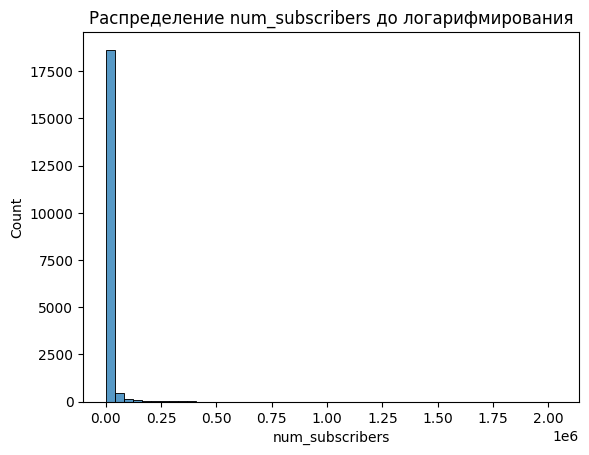

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_cleaned_with_embeddings['num_subscribers'], bins=50)
plt.title("Распределение num_subscribers до логарифмирования")

У этого распределения “длинный хвост вправо” — правосторонняя асимметрия.\
Необходимо трансформировать данные. Провожу логарифмирование.

Text(0.5, 1.0, 'Log-распределение num_subscribers')

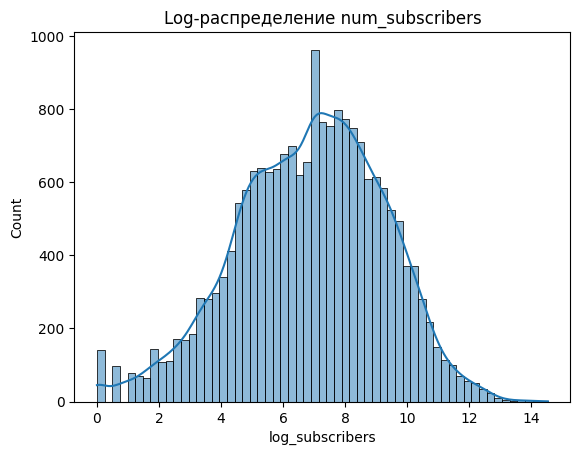

In [ ]:
df_cleaned_with_embeddings['log_subscribers'] = np.log1p(df_cleaned_with_embeddings['num_subscribers'])

sns.histplot(df_cleaned_with_embeddings['log_subscribers'], kde=True)
plt.title("Log-распределение num_subscribers")

Логарифмирование:\
	•	сжимает большие значения\
	•	растягивает малые\
	•	делает распределение более симметричным\
	•	помогает модели лучше обучаться на перекошенных таргетах


При регрессии лог-таргет помогает минимизировать относительную ошибку (в %). Метрика RMSE на логарифмах считает ошибку предсказания в лог-пространстве, значит после предсказания необходимо сделать обратное преобразование:
$y_{pred} = np.expm1(y_{pred\_log})$


In [ ]:
df_cleaned_with_embeddings.select_dtypes(include=['int64', 'float64']).drop('num_subscribers', axis=1)

id  avg_rating  num_reviews  num_published_lectures  \
0      4949114    5.000000            2                      19   
1      6505271    5.000000            1                      41   
2      5002136    5.000000            1                      33   
3      5227378    5.000000            6                      42   
4      4952148    5.000000            1                      42   
...        ...         ...          ...                     ...   
19451  2079420    4.491803         1663                      40   
19452  1394850    4.660000         1644                     236   
19453   375728    4.710000         1641                      49   
19454  1745296    4.760000         1618                     270   
19455  1095516    4.570000         1597                      60   

       num_published_practice_tests  instructional_level_simple  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           2   
3                                 0                           0   
4                                 0                           1   
...                             ...                         ...   
19451                             0                           0   
19452                             0                           0   
19453                             0                           1   
19454                             0                           0   
19455                             0                           1   

       content_length_practice_test_questions  content_hours  \
0                                           0            4.0   
1                                           0            7.0   
2                                           0           11.0   
3                                           0            4.0   
4                                           0            5.5   
...                                       ...            ...   
19451                                       0            5.0   
19452                                       0           25.0   
19453                                       0            6.5   
19454                                       0           41.0   
19455                                       0           11.0   

       num_caption_locales  num_locales  num_instructors  log_subscribers  
0                        0            5                1         2.639057  
1                        1            5                3         4.653960  
2                        1            5                1         3.295837  
3                        1            5                1         6.937314  
4                        0            5                1         2.564949  
...                    ...          ...              ...              ...  
19451                    1            5                1         9.481969  
19452                    1            5                1         9.045702  
19453                    1            5                1         8.383205  
19454                    1            5                1         8.906258  
19455                    1            5                1         8.555837  

[19456 rows x 12 columns]

In [ ]:
df_cleaned_with_embeddings#.drop('num_subscribers', inplace=True, axis=1)

id                                              title  \
0      4949114                     Java Programming for Beginners   
1      6505271  Java Multithreading and Concurrency from Basic...   
2      5002136  C# Intermediate - Part II (Reflection, Events,...   
3      5227378              Java Interview Questions With Answers   
4      4952148                  Python as a first coding language   
...        ...                                                ...   
19451  2079420       SQL - Cours Complet - Apprendre SQL de A à Z   
19452  1394850  Impariamo da zero SQL con Oracle, SQL Server e...   
19453   375728    Modelagem de Dados em Banco de Dados Relacional   
19454  1745296      Curso Completo de Bancos de Dados Relacionais   
19455  1095516            DBA Oracle Essencial - Aprenda do zero!   

                                                     url  is_paid  \
0              /course/java-programming-for-beginners-w/     True   
1      /course/java-multithreading-and-concurrency-fr...     True   
2      /course/c-intermediate-part-ii-reflection-even...     True   
3         /course/java-interview-questions-with-answers/     True   
4                           /course/python-first-coding/     True   
...                                                  ...      ...   
19451  /course/sql-cours-complet-apprendre-sql-de-a-a-z/     True   
19452      /course/impariamo-sql-con-oracle-e-sqlserver/     True   
19453  /course/modelagem-de-dados-em-banco-de-dados-r...     True   
19454  /course/curso-completo-de-banco-de-dados-relac...     True   
19455                          /course/curso-dba-oracle/     True   

                                     visible_instructors  \
0      [{'_class': 'user', 'id': 98760538, 'title': '...   
1      [{'_class': 'user', 'id': 63572698, 'title': '...   
2      [{'_class': 'user', 'id': 172362020, 'title': ...   
3      [{'_class': 'user', 'id': 61998636, 'title': '...   
4      [{'_class': 'user', 'id': 21991080, 'title': '...   
...                                                  ...   
19451  [{'_class': 'user', 'id': 57298856, 'title': '...   
19452  [{'_class': 'user', 'id': 36825298, 'title': '...   
19453  [{'_class': 'user', 'id': 451014, 'title': 'Ma...   
19454  [{'_class': 'user', 'id': 12238490, 'title': '...   
19455  [{'_class': 'user', 'id': 21994690, 'title': '...   

                                         published_title locale  \
0                       java-programming-for-beginners-w  en_US   
1      java-multithreading-and-concurrency-from-basic...  en_US   
2          c-intermediate-part-ii-reflection-events-linq  en_US   
3                  java-interview-questions-with-answers  en_US   
4                                    python-first-coding  en_US   
...                                                  ...    ...   
19451           sql-cours-complet-apprendre-sql-de-a-a-z  fr_FR   
19452               impariamo-sql-con-oracle-e-sqlserver  it_IT   
19453    modelagem-de-dados-em-banco-de-dados-relacional  pt_BR   
19454       curso-completo-de-banco-de-dados-relacionais  pt_BR   
19455                                   curso-dba-oracle  pt_BR   

                                                headline  num_subscribers  \
0      Learn how to Code in Java with no previous exp...               13   
1      Java Multithreading, Java Concurrency and Para...              104   
2      Value and Reference Types, Generics, Reflectio...               26   
3      Java Interview Questions With Answers : Practi...             1029   
4      Master programming skills using Python, a top ...               12   
...                                                  ...              ...   
19451  SQL avec des Cas Pratiques. Apprendre à Interr...            13120   
19452  Corso pratico completo  per creare query, prog...             8481   
19453  Aprenda a criar bases de dados relacionais con...             4372   
19454  Aprenda a trabalhar com os principais bancos d...  

Text(0.5, 1.0, 'Подписчики по уровню курса')

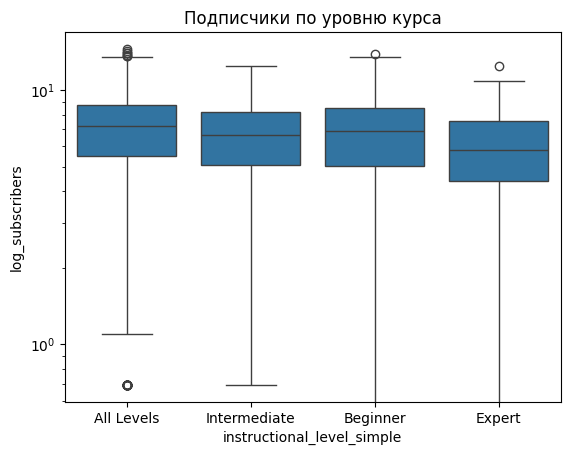

In [ ]:
sns.boxplot(x='instructional_level_simple', y='log_subscribers', data=df_cleaned_with_embeddings)
plt.yscale('log')  # если есть выбросы
plt.title("Подписчики по уровню курса")

Text(0.5, 1.0, 'Подписчики по году публикации')

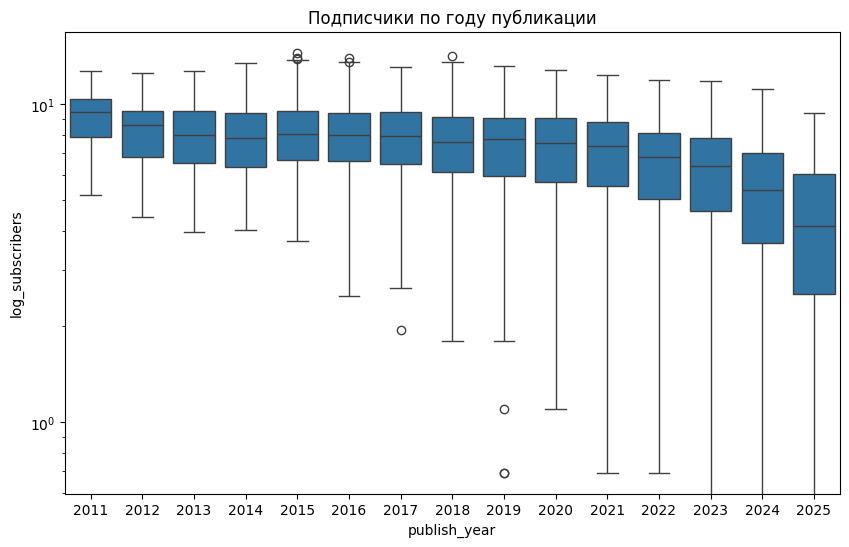

In [ ]:
df_cleaned_with_embeddings['published_time'] = pd.to_datetime(df_cleaned_with_embeddings['published_time'])
df_cleaned_with_embeddings['publish_year'] = df_cleaned_with_embeddings['published_time'].dt.year
df_cleaned_with_embeddings['publish_month'] = df_cleaned_with_embeddings['published_time'].dt.month

plt.figure(figsize=(10,6))
sns.boxplot(x='publish_year', y='log_subscribers', data=df_cleaned_with_embeddings)
plt.yscale('log')
plt.title("Подписчики по году публикации")

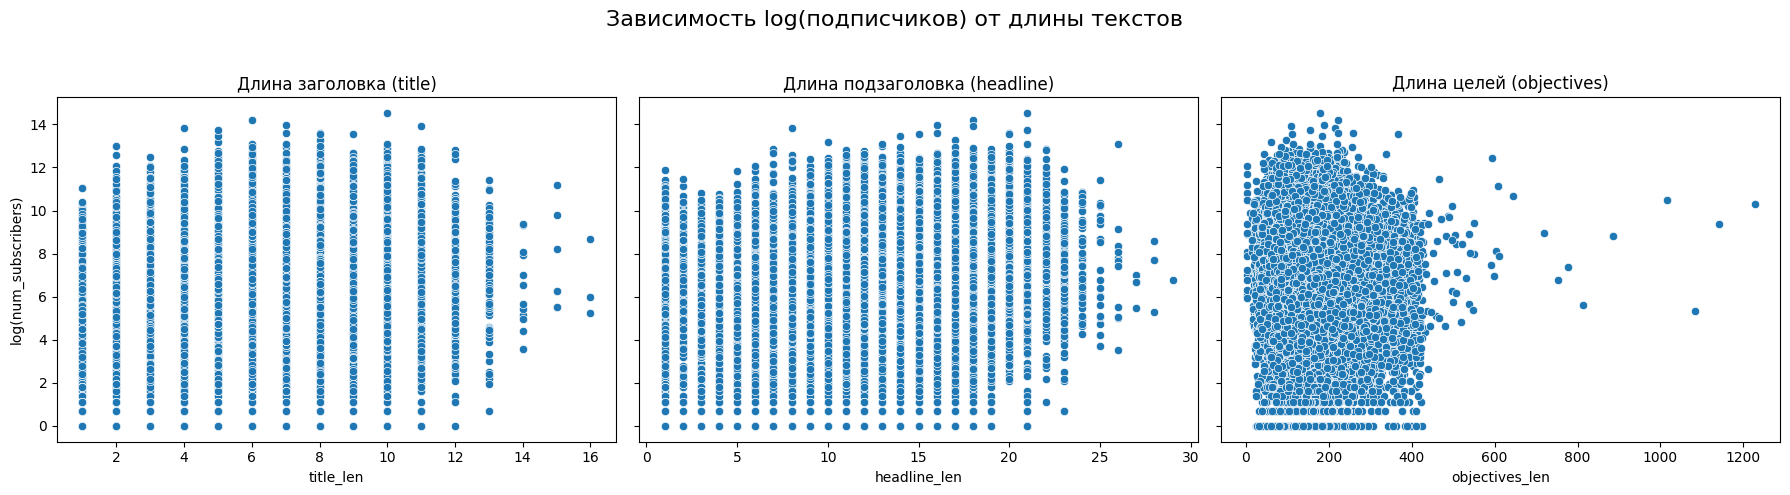

In [ ]:
df_cleaned_with_embeddings['title_len'] = df_cleaned_with_embeddings['title'].str.split().apply(len)
df_cleaned_with_embeddings['headline_len'] = df_cleaned_with_embeddings['headline'].str.split().apply(len)
df_cleaned_with_embeddings['objectives_len'] = df_cleaned_with_embeddings['objectives_summary'].apply(lambda x: ' '.join(x)).str.split().apply(len)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Заголовок
fig.suptitle("Зависимость log(подписчиков) от длины текстов", fontsize=16)

# Первый график
sns.scatterplot(x='title_len',
                y=df_cleaned_with_embeddings['log_subscribers'],
                data=df_cleaned_with_embeddings,
                ax=axes[0])
axes[0].set_title("Длина заголовка (title)")
axes[0].set_xlabel("title_len")
axes[0].set_ylabel("log(num_subscribers)")

# Второй график
sns.scatterplot(x='headline_len',
                y=df_cleaned_with_embeddings['log_subscribers'],
                data=df_cleaned_with_embeddings,
                ax=axes[1])
axes[1].set_title("Длина подзаголовка (headline)")
axes[1].set_xlabel("headline_len")

# Третий график
sns.scatterplot(x='objectives_len',
                y=df_cleaned_with_embeddings['log_subscribers'],
                data=df_cleaned_with_embeddings,
                ax=axes[2])
axes[2].set_title("Длина целей (objectives)")
axes[2].set_xlabel("objectives_len")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # оставить место под общий заголовок
plt.show()

In [ ]:
def instructor_features(text):
    try:
        instructors = eval(text) if isinstance(text, str) else []
        count = len(instructors)
        has_phd = any(re.search(r'ph\.?d', str(instr), re.IGNORECASE) for instr in instructors)
        return pd.Series([count, int(has_phd)])
    except Exception:
        return pd.Series([0, 0])

df[['instructor_count', 'has_phd']] = df['visible_instructors'].apply(instructor_features)

In [ ]:
df_cleaned_with_embeddings.drop(['publish_year', 'publish_month', 'title_len', 'headline_len',
       'objectives_len'], inplace=True, axis=1)

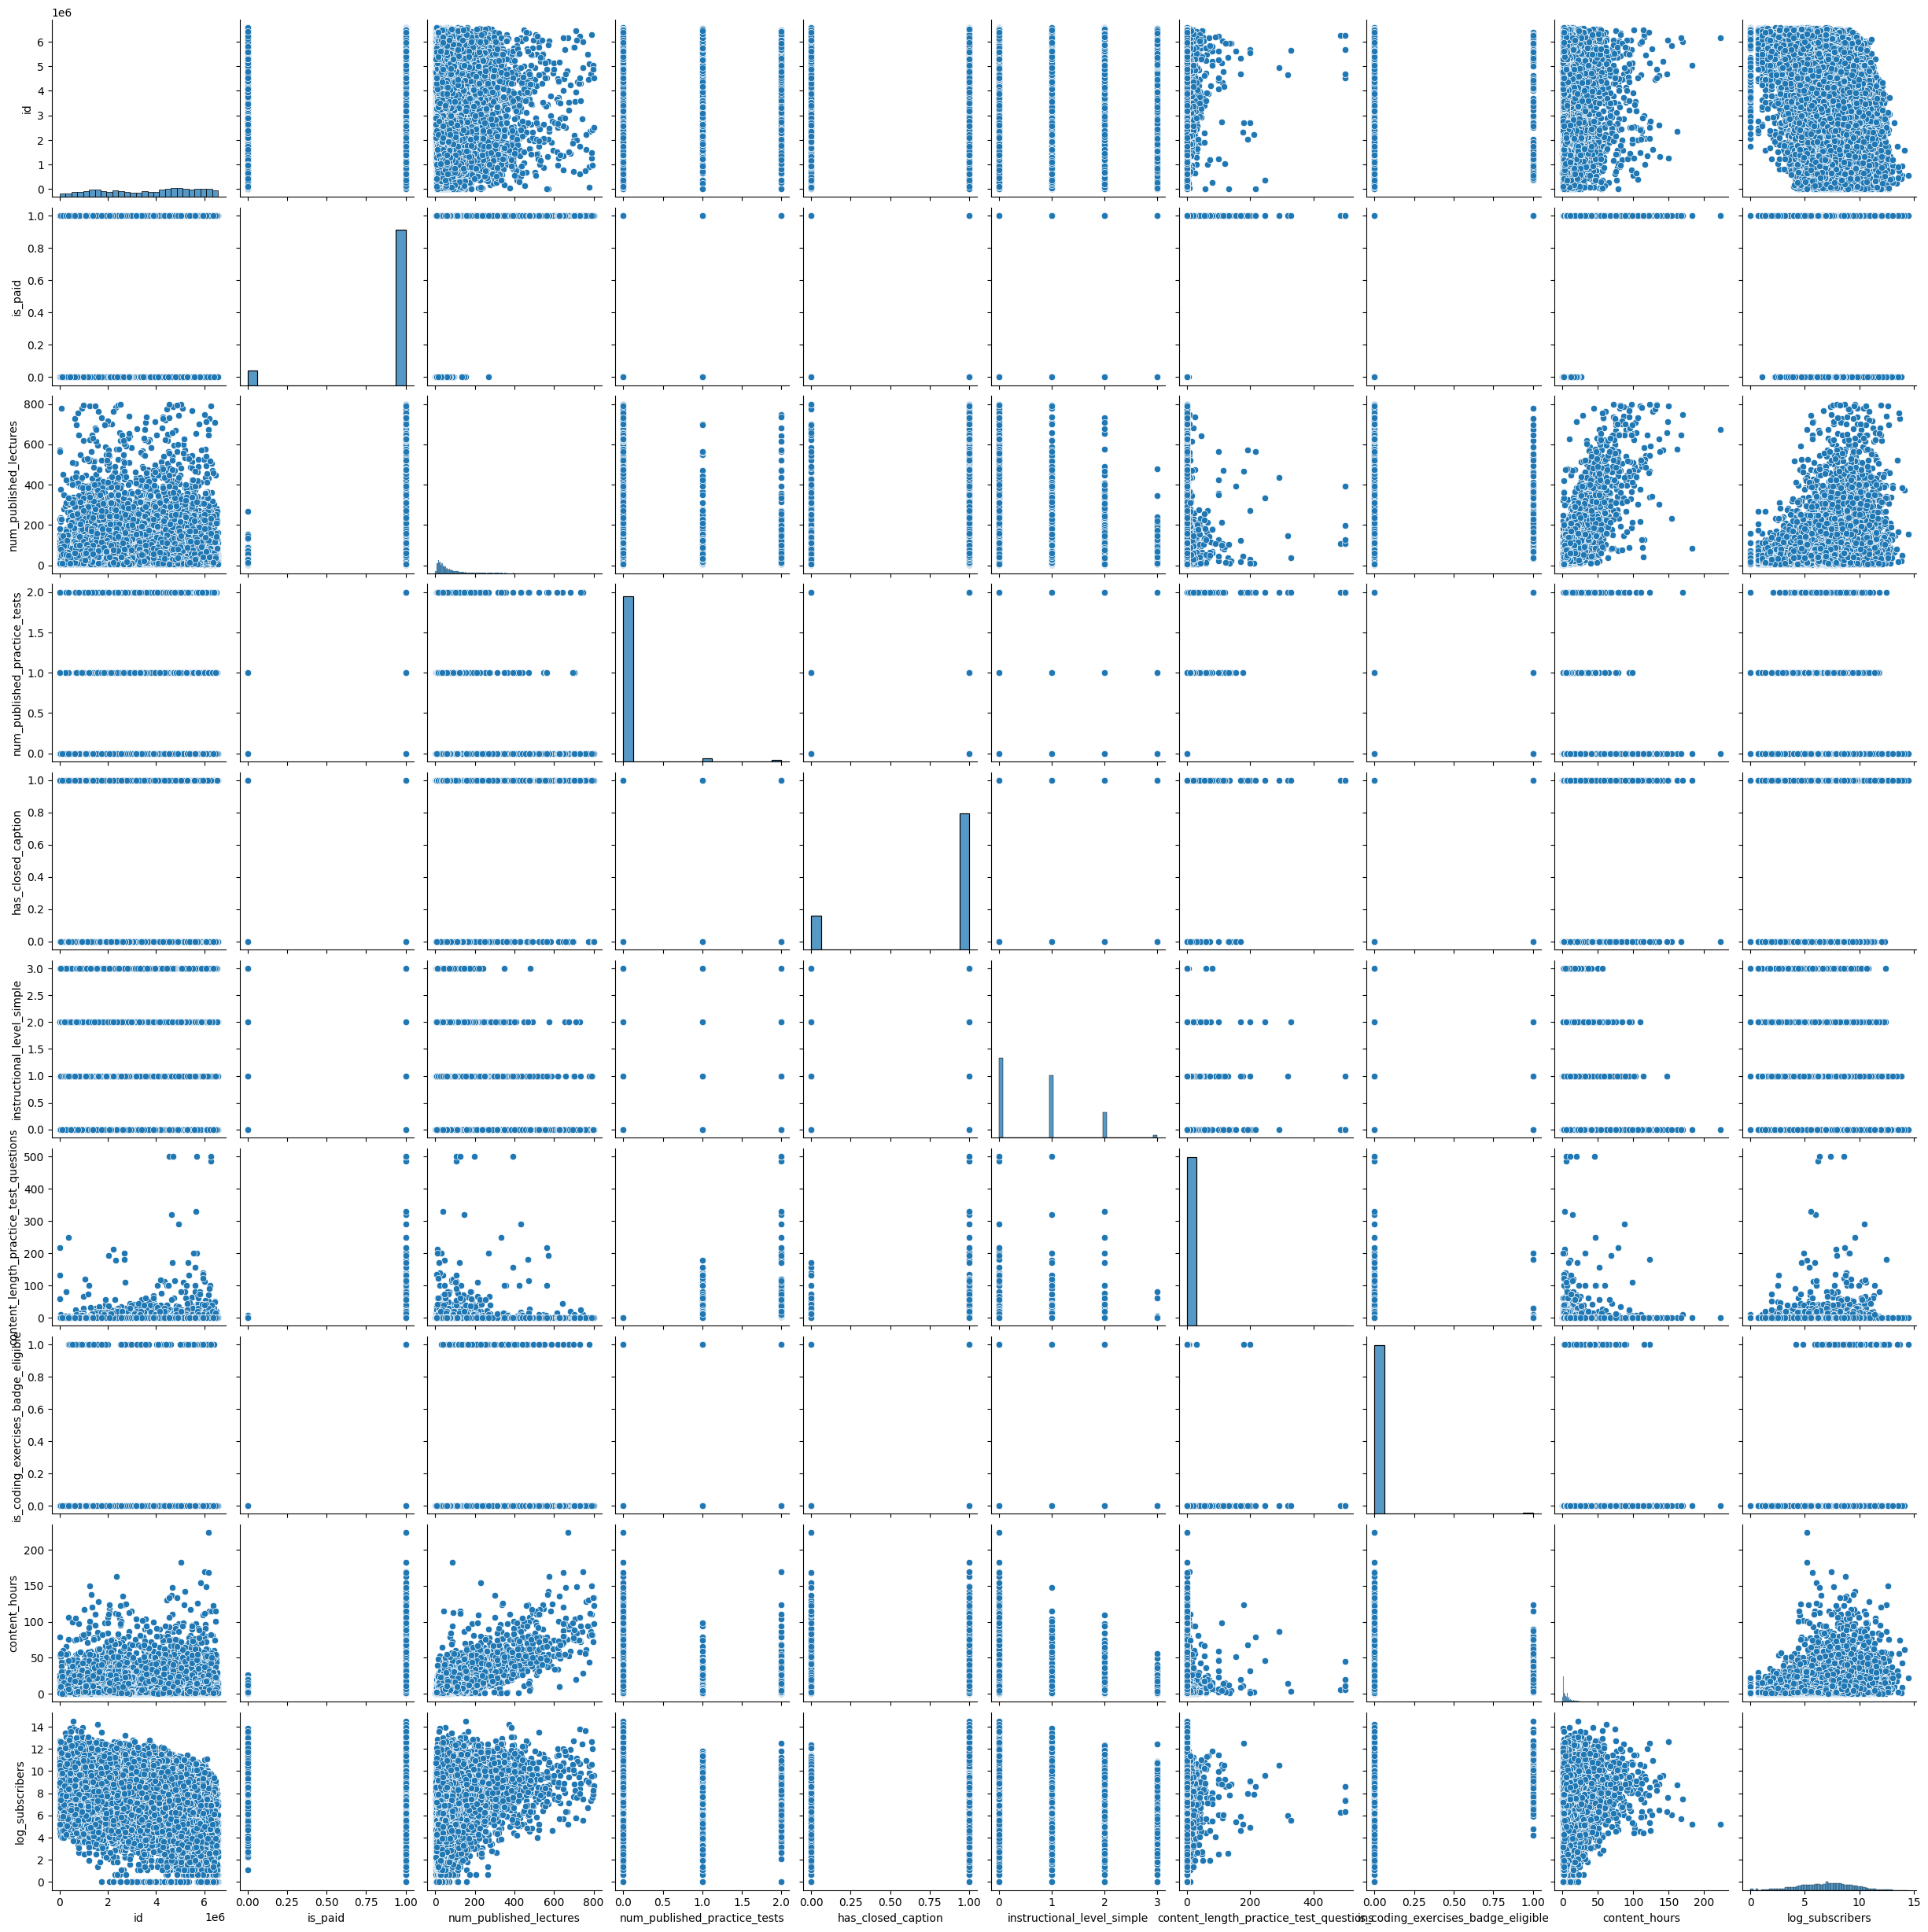

In [ ]:
sns.pairplot(df_cleaned_with_embeddings.drop('description_embedding', axis=1))

In [ ]:
df['published_time'] = pd.to_datetime(df['published_time'])
df['publish_year'] = df['published_time'].dt.year
df['publish_month'] = df['published_time'].dt.month
df['publish_dayofweek'] = df['published_time'].dt.dayofweek
df['publish_quarter'] = df['published_time'].dt.quarter

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016'),
  Text(6, 0, '2017'),
  Text(7, 0, '2018'),
  Text(8, 0, '2019'),
  Text(9, 0, '2020'),
  Text(10, 0, '2021'),
  Text(11, 0, '2022'),
  Text(12, 0, '2023'),
  Text(13, 0, '2024'),
  Text(14, 0, '2025')])

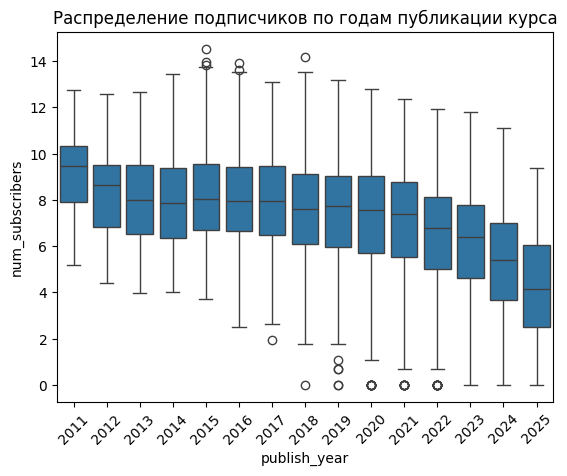

In [ ]:
sns.boxplot(x='publish_year', y=np.log1p(df['num_subscribers']), data=df)
plt.title("Распределение подписчиков по годам публикации курса")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Распределение подписчиков по месяцам')

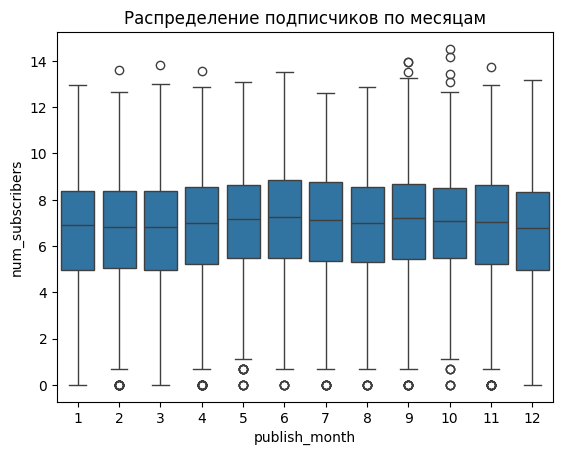

In [ ]:
sns.boxplot(x='publish_month', y=np.log1p(df['num_subscribers']), data=df)
plt.title("Распределение подписчиков по месяцам")

Text(0.5, 1.0, 'Распределение подписчиков по дню недели публикации')

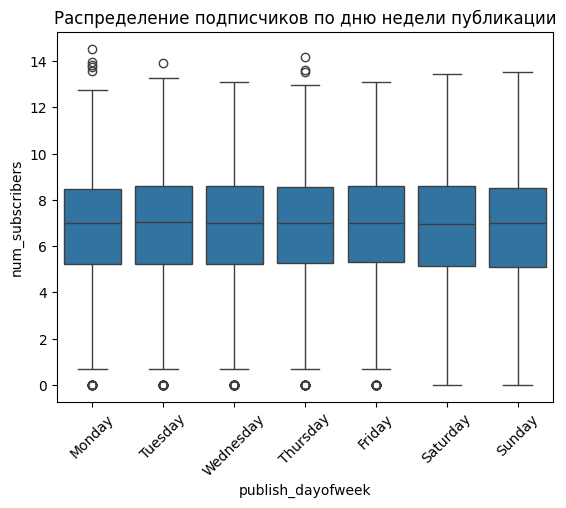

In [ ]:
import calendar

sns.boxplot(x='publish_dayofweek', y=np.log1p(df['num_subscribers']), data=df)
plt.xticks(ticks=range(7), labels=list(calendar.day_name), rotation=45)
plt.title("Распределение подписчиков по дню недели публикации")

/var/folders/x5/mdcz3nq93zj6s83zb5dv790c0000gn/T/ipykernel_10709/437434358.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['published_month'] = df['published_time'].dt.to_period("M")


Text(0.5, 0, 'Месяц')

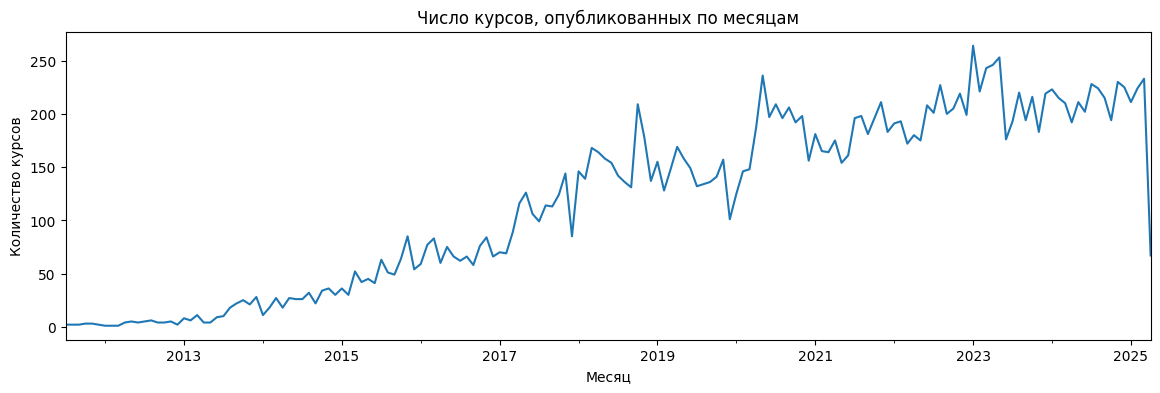

In [ ]:
df['published_month'] = df['published_time'].dt.to_period("M")
df_monthly = df.groupby('published_month').size()

df_monthly.plot(figsize=(14, 4))
plt.title("Число курсов, опубликованных по месяцам")
plt.ylabel("Количество курсов")
plt.xlabel("Месяц")

/var/folders/x5/mdcz3nq93zj6s83zb5dv790c0000gn/T/ipykernel_10709/2538408323.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['published_month'] = df['published_time'].dt.to_period("M")


Text(0, 0.5, 'log(num_subscribers)')

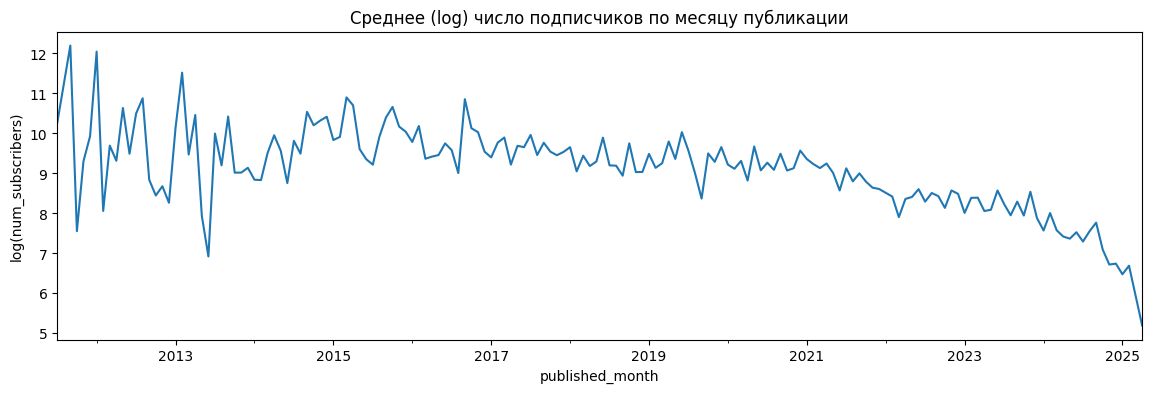

In [ ]:
df['published_month'] = df['published_time'].dt.to_period("M")
df_avg_subs = df.groupby('published_month')['num_subscribers'].mean()

df_avg_subs.apply(np.log1p).plot(figsize=(14, 4))
plt.title("Среднее (log) число подписчиков по месяцу публикации")
plt.ylabel("log(num_subscribers)")

In [ ]:
df_cleaned_with_embeddings

id                                              title  \
0      4949114                     Java Programming for Beginners   
1      6505271  Java Multithreading and Concurrency from Basic...   
2      5002136  C# Intermediate - Part II (Reflection, Events,...   
3      5227378              Java Interview Questions With Answers   
4      4952148                  Python as a first coding language   
...        ...                                                ...   
19451  2079420       SQL - Cours Complet - Apprendre SQL de A à Z   
19452  1394850  Impariamo da zero SQL con Oracle, SQL Server e...   
19453   375728    Modelagem de Dados em Banco de Dados Relacional   
19454  1745296      Curso Completo de Bancos de Dados Relacionais   
19455  1095516            DBA Oracle Essencial - Aprenda do zero!   

                                                     url  is_paid  \
0              /course/java-programming-for-beginners-w/     True   
1      /course/java-multithreading-and-concurrency-fr...     True   
2      /course/c-intermediate-part-ii-reflection-even...     True   
3         /course/java-interview-questions-with-answers/     True   
4                           /course/python-first-coding/     True   
...                                                  ...      ...   
19451  /course/sql-cours-complet-apprendre-sql-de-a-a-z/     True   
19452      /course/impariamo-sql-con-oracle-e-sqlserver/     True   
19453  /course/modelagem-de-dados-em-banco-de-dados-r...     True   
19454  /course/curso-completo-de-banco-de-dados-relac...     True   
19455                          /course/curso-dba-oracle/     True   

                                     visible_instructors  \
0      [{'_class': 'user', 'id': 98760538, 'title': '...   
1      [{'_class': 'user', 'id': 63572698, 'title': '...   
2      [{'_class': 'user', 'id': 172362020, 'title': ...   
3      [{'_class': 'user', 'id': 61998636, 'title': '...   
4      [{'_class': 'user', 'id': 21991080, 'title': '...   
...                                                  ...   
19451  [{'_class': 'user', 'id': 57298856, 'title': '...   
19452  [{'_class': 'user', 'id': 36825298, 'title': '...   
19453  [{'_class': 'user', 'id': 451014, 'title': 'Ma...   
19454  [{'_class': 'user', 'id': 12238490, 'title': '...   
19455  [{'_class': 'user', 'id': 21994690, 'title': '...   

                                         published_title  \
0                       java-programming-for-beginners-w   
1      java-multithreading-and-concurrency-from-basic...   
2          c-intermediate-part-ii-reflection-events-linq   
3                  java-interview-questions-with-answers   
4                                    python-first-coding   
...                                                  ...   
19451           sql-cours-complet-apprendre-sql-de-a-a-z   
19452               impariamo-sql-con-oracle-e-sqlserver   
19453    modelagem-de-dados-em-banco-de-dados-relacional   
19454       curso-completo-de-banco-de-dados-relacionais   
19455                                   curso-dba-oracle   

                                                  locale  \
0      {'_class': 'locale', 'locale': 'en_US', 'title...   
1      {'_class': 'locale', 'locale': 'en_US', 'title...   
2      {'_class': 'locale', 'locale': 'en_US', 'title...   
3      {'_class': 'locale', 'locale': 'en_US', 'title...   
4      {'_class': 'locale', 'locale': 'en_US', 'title...   
...                                                  ...   
19451  {'_class': 'locale', 'locale': 'fr_FR', 'title...   
19452  {'_class': 'locale', 'locale': 'it_IT', 'title...   
19453  {'_class': 'locale', 'locale': 'pt_BR', 'title...   
19454  {'_class': 'locale', 'locale': 'pt_BR', 'title...   
19455  {'_class': 'locale', 'locale': 'pt_BR', 'title...   

                                                headline  \
0      Learn how to Code in Java with no previous exp...   
1      Java Multithreading, Java Concurrency and Para...   
2      Valu

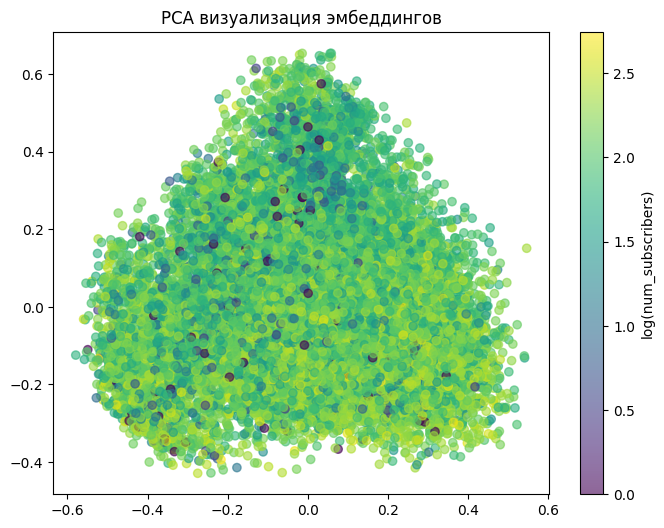

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import ast

# Преобразуем строку эмбеддинга в вектор
# df_cleaned_with_embeddings['description_embedding'] = df_cleaned_with_embeddings['description_embedding'].apply(lambda x: [float(s.strip()) for s in x.strip('[]').split()])
embedding_matrix = np.vstack(df_cleaned_with_embeddings['description_embedding'].values)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)
df_cleaned_with_embeddings['pca_1'], df_cleaned_with_embeddings['pca_2'] = pca_result[:, 0], pca_result[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_with_embeddings['pca_1'], df_cleaned_with_embeddings['pca_2'], c=np.log1p(df_cleaned_with_embeddings['log_subscribers']), cmap='viridis', alpha=0.6)
plt.colorbar(label='log(num_subscribers)')
plt.title('PCA визуализация эмбеддингов')
plt.show()

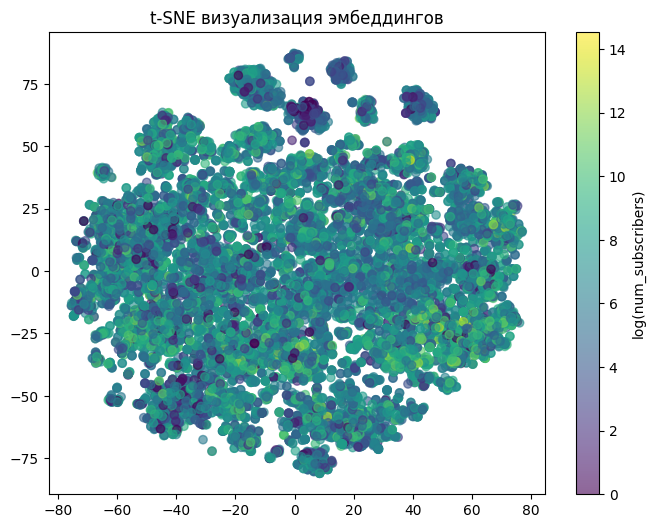

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import ast

# Преобразуем строку эмбеддинга в вектор
embedding_matrix = np.vstack(df_cleaned_with_embeddings['description_embedding'].values)

# t-SNE (на практике лучше брать 1000–2000 точек для ускорения)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(embedding_matrix)

df_cleaned_with_embeddings['tsne_1'], df_cleaned_with_embeddings['tsne_2'] = tsne_result[:, 0], tsne_result[:, 1]



# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_with_embeddings['tsne_1'], df_cleaned_with_embeddings['tsne_2'], c=df_cleaned_with_embeddings['log_subscribers'], cmap='viridis', alpha=0.6)
plt.colorbar(label='log(num_subscribers)')
plt.title("t-SNE визуализация эмбеддингов")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


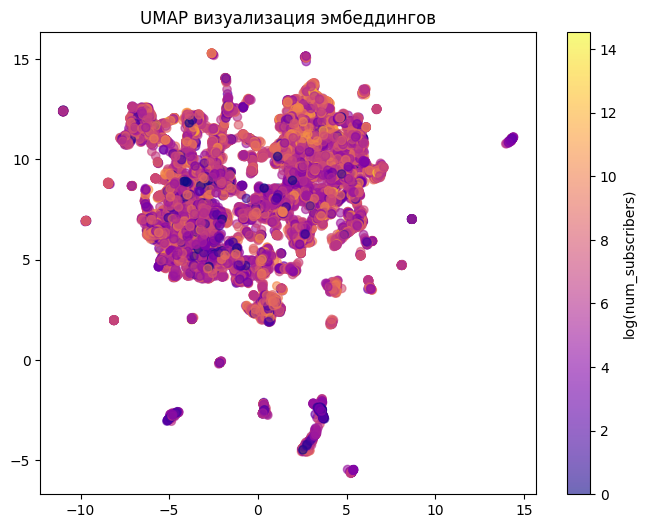

In [ ]:
import umap.umap_ as umap  # pip install umap-learn

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(embedding_matrix)

df_cleaned_with_embeddings['umap_1'], df_cleaned_with_embeddings['umap_2'] = umap_result[:, 0], umap_result[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_with_embeddings['umap_1'], df_cleaned_with_embeddings['umap_2'], c=df_cleaned_with_embeddings['log_subscribers'], cmap='plasma', alpha=0.6)
plt.colorbar(label='log(num_subscribers)')
plt.title("UMAP визуализация эмбеддингов")
plt.show()

In [ ]:
df_cleaned_with_embeddings.columns

Index(['id', 'title', 'url', 'is_paid', 'visible_instructors',
       'published_title', 'locale', 'headline', 'num_subscribers',
       'caption_locales', 'avg_rating', 'num_reviews',
       'num_published_lectures', 'num_published_practice_tests',
       'has_closed_caption', 'caption_languages', 'created',
       'instructional_level_simple', 'content_length_practice_test_questions',
       'published_time', 'objectives_summary',
       'is_coding_exercises_badge_eligible', 'content_info_short',
       'description_embedding', 'content_hours', 'instructor_jobs',
       'num_caption_locales', 'num_locales', 'num_instructors',
       'log_subscribers'],
      dtype='object')

In [22]:
df_cleaned_with_embeddings = df_cleaned_with_embeddings[['title', 'is_paid',
       'locale', 'num_subscribers',
       'caption_locales', 'avg_rating',
       'num_published_lectures', 'num_published_practice_tests',
       'has_closed_caption',
       'instructional_level_simple', 'content_length_practice_test_questions',
       'content_hours', 'instructor_embedding',
       'description_embedding', 'instructor_jobs', 'num_caption_locales', 'num_locales', 'num_instructors']]

In [23]:
df_cleaned_with_embeddings['success_score'] = (df_cleaned_with_embeddings['avg_rating'] * np.log1p(df_cleaned_with_embeddings['num_subscribers']))
# df_cleaned_with_embeddings = df_cleaned_with_embeddings.drop(['avg_rating', 'num_subscribers'], axis=1)

/var/folders/x5/mdcz3nq93zj6s83zb5dv790c0000gn/T/ipykernel_13420/232686510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_with_embeddings['success_score'] = (df_cleaned_with_embeddings['avg_rating'] * np.log1p(df_cleaned_with_embeddings['num_subscribers']))


Text(0.5, 1.0, 'Log-распределение success_score')

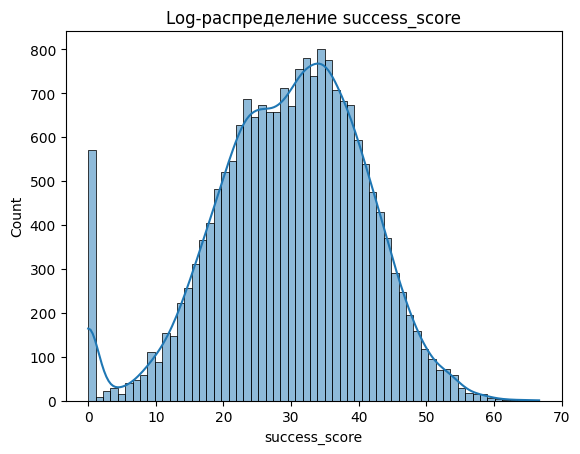

In [24]:
sns.histplot(df_cleaned_with_embeddings['success_score'], kde=True)
plt.title("Log-распределение success_score")

In [25]:
df_cleaned_with_embeddings = df_cleaned_with_embeddings[df_cleaned_with_embeddings['avg_rating']>0.0]

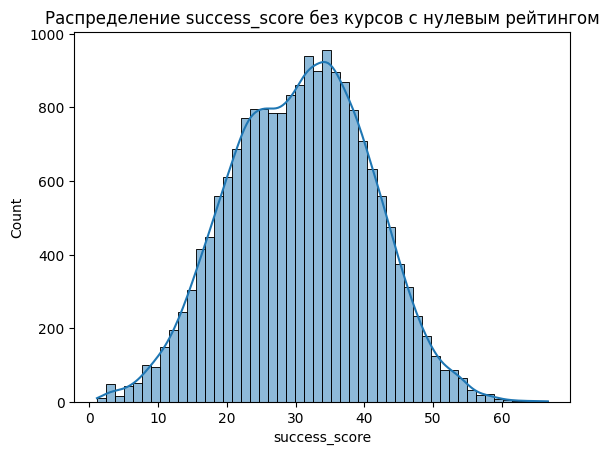

In [26]:
sns.histplot(df_cleaned_with_embeddings['success_score'], bins=50, kde=True)
plt.title("Распределение success_score без курсов с нулевым рейтингом")
plt.show()

/var/folders/x5/mdcz3nq93zj6s83zb5dv790c0000gn/T/ipykernel_13420/759363213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerics['success_score'] = df_cleaned_with_embeddings['success_score']


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'num_published_lectures'),
  Text(1.5, 0, 'num_published_practice_tests'),
  Text(2.5, 0, 'instructional_level_simple'),
  Text(3.5, 0, 'content_hours'),
  Text(4.5, 0, 'num_caption_locales'),
  Text(5.5, 0, 'num_instructors'),
  Text(6.5, 0, 'success_score')])

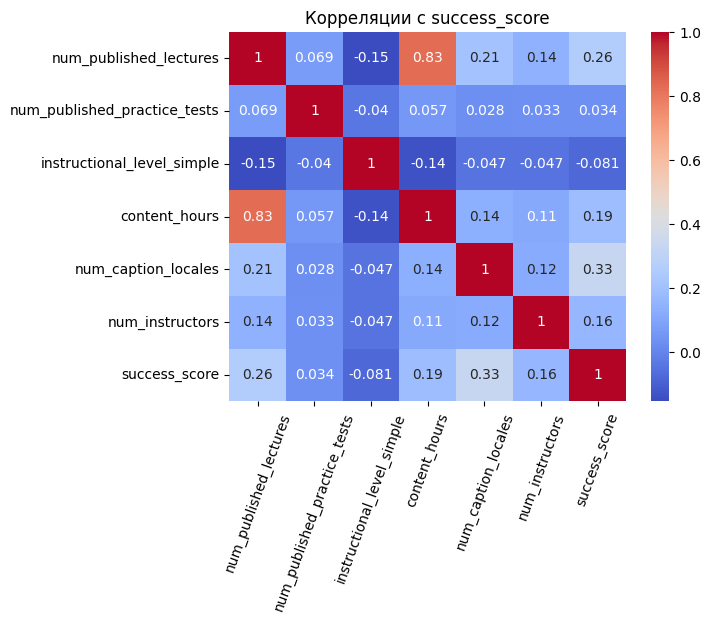

In [27]:
numerics = df_cleaned_with_embeddings[['num_published_lectures', 'num_published_practice_tests', 'instructional_level_simple', 'content_hours', 'num_caption_locales', 'num_instructors', 'success_score']]#.select_dtypes(include=['int64', 'float64'])
numerics['success_score'] = df_cleaned_with_embeddings['success_score']

corr = numerics.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляции с success_score")
plt.xticks(rotation=70)
# plt.xticks(rotation=70)

In [ ]:
df_cleaned_with_embeddings['locale'].value_counts()

locale
en_US    12836
pt_BR     1003
en_GB      865
tr_TR      564
es_ES      534
ja_JP      474
fr_FR      364
ko_KR      246
ar_AR      238
de_DE      205
en_IN      201
es_LA      179
ru_RU      170
zh_CN      144
es_MX      134
pl_PL      129
id_ID      115
it_IT      108
zh_TW       83
hi_IN       57
th_TH       56
es_CO       51
vi_VN       27
az_AZ       13
ur_PK       12
pt_PT       12
ta_IN       10
ro_RO        9
es_CL        7
uk_UA        5
bn_IN        5
es_VE        5
he_IL        5
nl_NL        3
zh_HK        2
el_GR        2
ms_MY        2
te_IN        2
sq_AL        1
ka_GE        1
fa_IR        1
sw_KE        1
hu_HU        1
cs_CZ        1
fr_CA        1
ml_IN        1
my_MM        1
Name: count, dtype: int64

In [28]:
embedding_matrix_description = np.vstack(df_cleaned_with_embeddings['description_embedding'].values)

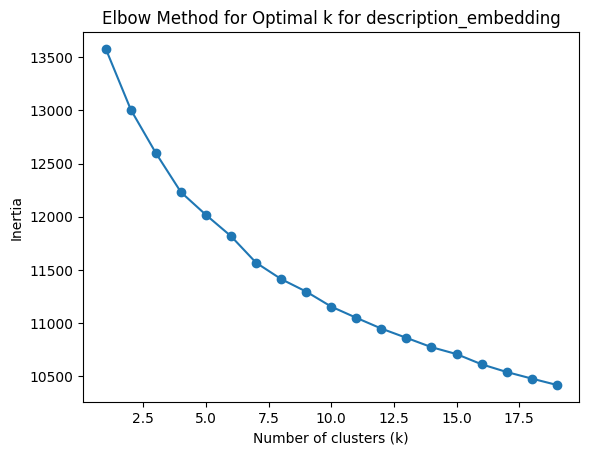

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_matrix_description)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k for description_embedding')
plt.show()

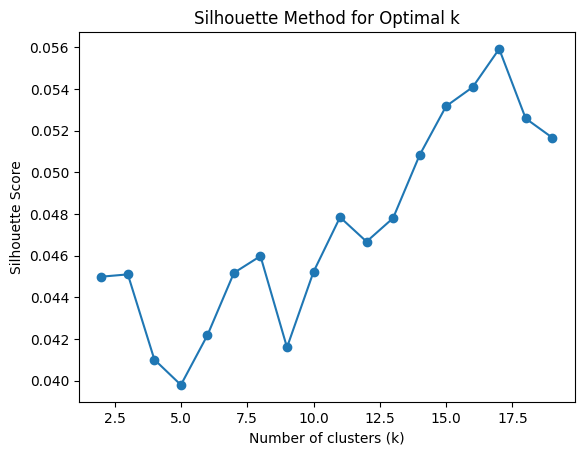

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix_description)
    score = silhouette_score(embedding_matrix_description, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 20), silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [29]:
best_k = 8
from sklearn.cluster import KMeans

kmeans_description = KMeans(n_clusters=best_k, random_state=42)
df_cleaned_with_embeddings['description_embedding_cluster'] = kmeans_description.fit_predict(embedding_matrix_description)

import joblib

joblib.dump(kmeans_description, '../models/kmeans_description.pkl')

['../models/kmeans_description.pkl']

In [30]:
embedding_matrix_instructor = np.vstack(df_cleaned_with_embeddings['instructor_embedding'].values)

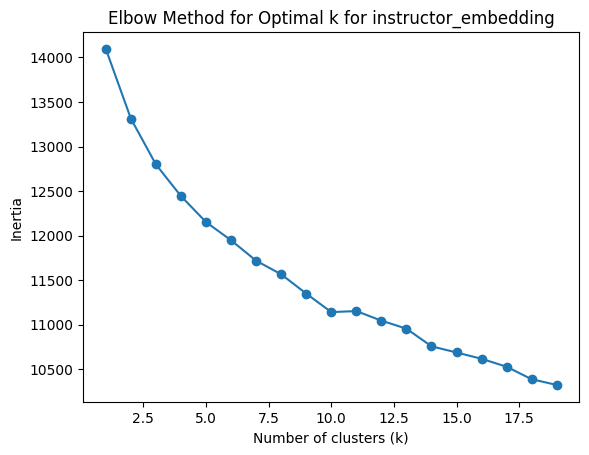

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_matrix_instructor)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k for instructor_embedding')
plt.show()

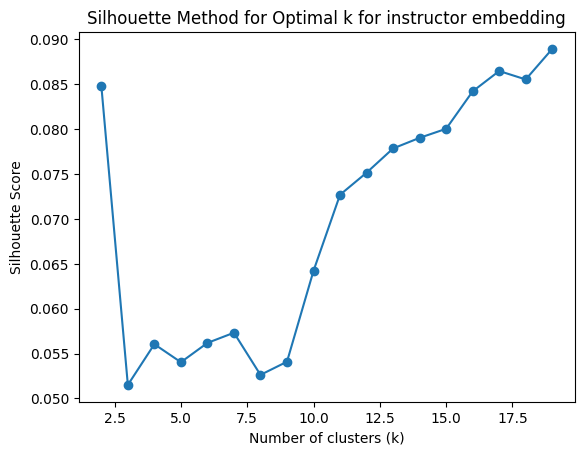

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix_instructor)
    score = silhouette_score(embedding_matrix_instructor, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 20), silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k for instructor embedding')
plt.show()

In [31]:
best_k = 11

kmeans_instructor = KMeans(n_clusters=best_k, random_state=42)
df_cleaned_with_embeddings['instructor_embedding_cluster'] = kmeans_instructor.fit_predict(embedding_matrix_instructor)

joblib.dump(kmeans_instructor, '../models/kmeans_instructor.pkl')


['../models/kmeans_instructor.pkl']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


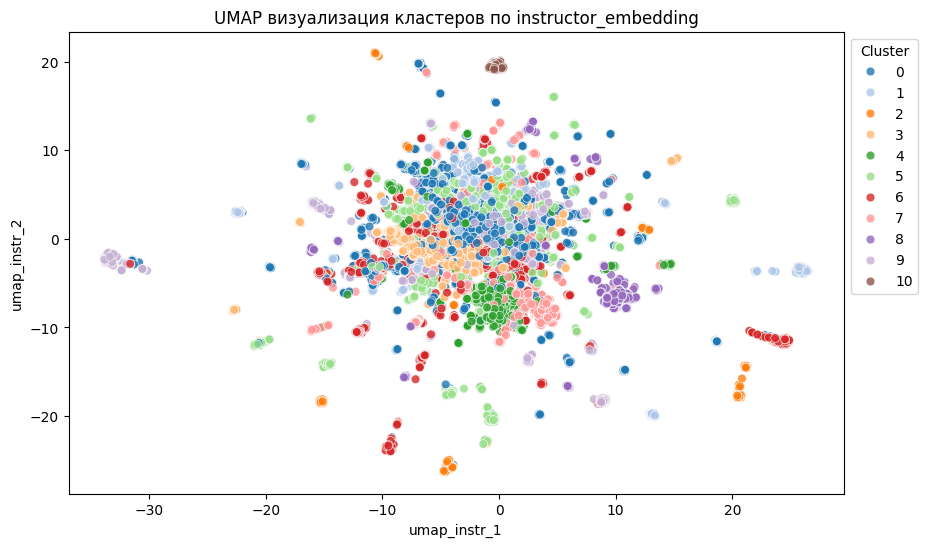

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP для снижения размерности до 2D
reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
umap_result = reducer.fit_transform(embedding_matrix)

umap_df = pd.DataFrame(umap_result)
umap_df.columns = ['umap_instr_1', 'umap_instr_2']

# Красим по кластерам
plt.figure(figsize=(10, 6))
sns.scatterplot(x='umap_instr_1', y='umap_instr_2', hue=df_cleaned_with_embeddings['instructor_embedding_cluster'], data=umap_df, palette='tab20', s=40, alpha=0.8)
plt.title('UMAP визуализация кластеров по instructor_embedding')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()

# Model Preprocessing

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from scipy.stats import randint, uniform
import numpy as np

In [33]:
numeric_features = [
    'num_published_lectures',
    'num_published_practice_tests', 'content_length_practice_test_questions',
    'content_hours', 'num_caption_locales', 'num_locales', 'num_instructors'
]

categorical_features = [
    'locale', 'is_paid', 'has_closed_caption', 'instructional_level_simple'
]

cluster_features = [
    'description_embedding_cluster', 'instructor_embedding_cluster'
]

features = numeric_features + categorical_features + cluster_features

In [34]:
target = 'success_score'  # avg_rating * log1p(num_subscribers)

X = df_cleaned_with_embeddings[features]
y = df_cleaned_with_embeddings[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features + cluster_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(5, 30),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    rf_pipeline,
    rf_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=8, regressor__min_samples_split=6, regressor__n_estimators=120; total time=   0.6s
[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=8, regressor__min_samples_split=6, regressor__n_estimators=120; total time=   0.6s
[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=8, regressor__min_samples_split=6, regressor__n_estimators=120; total time=   0.6s
[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=3, regressor__min_samples_split=8, regressor__n_estimators=430; total time=   2.2s
[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=3, regressor__min_samples_split=8, regressor__n_estimators=430; total time=   2.1s
[CV] END regressor__max_depth=11, regressor__max_features=log2, regressor__min_samples_leaf=3, regressor__min_samples_split=8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['num_published_lectures',
                                                                                'num_published_practice_tests',
                                                                                'content_length_practice_test_questions',
                                                                                'content_hours',
                                                                                'num_caption_locales',
                                                                                'num_locales',
                                                                                'num_instructors',
                                                                                'description_embedding_cluster',
                                                                                'instructor_embedding_cluster']...
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x415815840>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x419bf47c0>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3c60931c0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

# XGB

In [ ]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist'))
])

xgb_param_grid = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(3, 15),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

xgb_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=13, regressor__n_estimators=171, regressor__subsample=0.7993292420985183; total time=   0.8s
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=13, regressor__n_estimators=171, regressor__subsample=0.7993292420985183; total time=   0.8s
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=13, regressor__n_estimators=171, regressor__subsample=0.7993292420985183; total time=   0.8s
[CV] END regressor__colsample_bytree=0.5780093202212182, regressor__learning_rate=0.05679835610086079, regressor__max_depth=13, regressor__n_estimators=187, regressor__subsample=0.6668543055695109; total time=   0.5s
[CV] END regressor__colsample_bytree=0.5780093202212182, regressor__learni

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['num_published_lectures',
                                                                                'num_published_practice_tests',
                                                                                'content_length_practice_test_questions',
                                                                                'content_hours',
                                                                                'num_caption_locales',
                                                                                'num_locales',
                                                                                'num_instructors',
                                                                                'description_embedding_cluster',
                                                                                'instructor_embedding_cluster']...
                                        'regressor__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3303f3fd0>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3303f2e30>,
                                        'regressor__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x3303f2f20>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
# random forest
y_pred_rf = rf_search.best_estimator_.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print(f"RandomForest Best RMSE: {rmse_rf:.4f}")
print(f"RandomForest Best Params: {rf_search.best_params_}")

# xgb
y_pred_xgb = xgb_search.best_estimator_.predict(X_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Best RMSE: {rmse_xgb:.4f}")
print(f"XGBoost Best Params: {xgb_search.best_params_}")

RandomForest Best RMSE: 8.1013
RandomForest Best Params: {'regressor__max_depth': 17, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 426}
XGBoost Best RMSE: 8.0815
XGBoost Best Params: {'regressor__colsample_bytree': np.float64(0.8856351733429728), 'regressor__learning_rate': np.float64(0.03221339552022711), 'regressor__max_depth': 9, 'regressor__n_estimators': 140, 'regressor__subsample': np.float64(0.9574798377718904)}


# Catboost

In [ ]:
from catboost import CatBoostRegressor

cat_features = np.where([True if col in categorical_features else False for col in X.columns])[0].tolist()

catboost_pipeline = Pipeline(steps=[
    ('regressor', CatBoostRegressor(cat_features=cat_features))
])

catboost_param_grid = {
    'regressor__iterations': randint(300, 1000),
    'regressor__depth': randint(4, 10),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__l2_leaf_reg': uniform(1, 5)
}


catboost_search = RandomizedSearchCV(
    catboost_pipeline,
    catboost_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

catboost_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 9.5030238	total: 5.47ms	remaining: 3.11s
1:	learn: 9.1877788	total: 8.69ms	remaining: 2.47s
2:	learn: 8.9854373	total: 12.2ms	remaining: 2.31s
3:	learn: 8.8302268	total: 15.1ms	remaining: 2.14s
4:	learn: 8.7114604	total: 18ms	remaining: 2.04s
5:	learn: 8.6273205	total: 20.7ms	remaining: 1.94s
6:	learn: 8.5563719	total: 22.8ms	remaining: 1.84s
7:	learn: 8.4928853	total: 25.8ms	remaining: 1.81s
8:	learn: 8.4327897	total: 28.3ms	remaining: 1.76s
9:	learn: 8.3989583	total: 30.3ms	remaining: 1.7s
10:	learn: 8.3659583	total: 32.7ms	remaining: 1.66s
11:	learn: 8.3437678	total: 34.8ms	remaining: 1.62s
12:	learn: 8.3133736	total: 37.1ms	remaining: 1.59s
13:	learn: 8.2913171	total: 39.2ms	remaining: 1.56s
14:	learn: 8.2785474	total: 41.6ms	remaining: 1.54s
15:	learn: 8.2677686	total: 44.6ms	remaining: 1.54s
16:	learn: 8.2442824	total: 47.4ms	remaining: 1.54s
17:	learn: 8.2274171	total: 49.7ms	remaining: 1.52s
18:	learn: 8.193

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('regressor',
                                              <catboost.core.CatBoostRegressor object at 0x3f8595420>)]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'regressor__depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3db1661a0>,
                                        'regressor__iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33037f760>,
                                        'regressor__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x4185843d0>,
                                        'regressor__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x415d95b10>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
# catboost
y_pred_catboost = catboost_search.best_estimator_.predict(X_test)
rmse_catboost = root_mean_squared_error(y_test, y_pred_catboost)
print(f"catboostoost Best RMSE: {rmse_catboost:.4f}")
print(f"catboostoost Best Params: {catboost_search.best_params_}")

catboostoost Best RMSE: 8.0636
catboostoost Best Params: {'regressor__depth': 8, 'regressor__iterations': 643, 'regressor__l2_leaf_reg': np.float64(5.162213204002109), 'regressor__learning_rate': np.float64(0.07370173320348283)}


# MLP

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import train_test_split

class TorchMLPRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_sizes=[512, 256, 128], lr=0.001, epochs=50, batch_size=32, verbose=False, patience=20):
        self.input_dim = input_dim
        self.hidden_sizes = hidden_sizes
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.patience = patience

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self._build_model()

    def _build_model(self):
        layers = []
        prev_size = self.input_dim
        for h in self.hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.Dropout(0.3))
            prev_size = h
        layers.append(nn.Linear(prev_size, 1))
        self.model = nn.Sequential(*layers).to(self.device)

    def fit(self, X, y):
        self.model.train()
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        # Split into train/val for early stopping
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.MSELoss()

        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        best_val_loss = float('inf')
        patience_counter = 0
        best_model_state = None

        for epoch in range(self.epochs):
            self.model.train()
            epoch_loss = 0.0
            for batch_X, batch_y in train_loader:
                batch_X = batch_X.to(self.device)
                batch_y = batch_y.to(self.device)

                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            # Validation loss
            self.model.eval()
            with torch.no_grad():
                val_preds = self.model(X_val.to(self.device))
                val_loss = criterion(val_preds, y_val.to(self.device)).item()

            if self.verbose and (epoch+1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {epoch_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}")

            # Early stopping check
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                best_model_state = self.model.state_dict()
            else:
                patience_counter += 1

            if patience_counter >= self.patience:
                if self.verbose:
                    print(f"Early stopping at epoch {epoch+1}")
                break

        # Load best model
        if best_model_state is not None:
            self.model.load_state_dict(best_model_state)

        return self

    def predict(self, X):
        self.model.eval()
        X = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            preds = self.model(X).cpu().numpy().ravel()
        return preds

    def save_model(self, path="mlp_model.pth"):
        torch.save(self.model.state_dict(), path)

    def load_model(self, path="mlp_model.pth"):
        self._build_model()  # убедись, что структура модели построена
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)


In [19]:

X = df_cleaned_with_embeddings[features]
y = df_cleaned_with_embeddings[target]

preprocessor_mlp = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features + cluster_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X_processed = preprocessor_mlp.fit_transform(X)
X_arr = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
X_train, X_test, y_train, y_test = train_test_split(X_arr, y.values, test_size=0.2, random_state=42)


torch_model = TorchMLPRegressor(
    input_dim=X_train.shape[1],
    hidden_sizes=[512, 256, 128],
    epochs=1000,
    batch_size=1024,
    verbose=True
)

torch_model.fit(X_train, y_train)

y_pred = torch_model.predict(X_test)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")

Epoch 10/1000, Train Loss: 835.6002, Val Loss: 818.8909
Epoch 20/1000, Train Loss: 359.5021, Val Loss: 333.5308
Epoch 30/1000, Train Loss: 103.8989, Val Loss: 100.5555
Epoch 40/1000, Train Loss: 73.4180, Val Loss: 70.7190
Epoch 50/1000, Train Loss: 70.1874, Val Loss: 70.0670
Epoch 60/1000, Train Loss: 69.5982, Val Loss: 70.4022
Epoch 70/1000, Train Loss: 66.4075, Val Loss: 70.4330
Epoch 80/1000, Train Loss: 65.6292, Val Loss: 70.2917
Early stopping at epoch 87
Test RMSE: 8.2032


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_sizes': [[128, 64], [256, 128], [512, 256, 128]],
    'lr': [0.001, 0.0005],
    'epochs': [100],
    'batch_size': [32, 64]
}

grid = GridSearchCV(
    estimator=TorchMLPRegressor(input_dim=X_train.shape[1], verbose=False),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

Best parameters: {'batch_size': 32, 'epochs': 100, 'hidden_sizes': [256, 128], 'lr': 0.0005}
Best RMSE: 8.2278236534461


In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

dummy_rmse = root_mean_squared_error(y_test, y_dummy_pred)
print(f"Dummy RMSE: {dummy_rmse:.4f}")

Dummy RMSE: 11.0257


In [ ]:
(rmse/y_dummy_pred[0])*100

np.float64(30.943619473813683)

# Ensemble

In [35]:
# 1. Числовые признаки
numeric_features = [
    'num_published_lectures',
    'num_published_practice_tests', 'content_length_practice_test_questions',
    'content_hours', 'num_caption_locales', 'num_locales', 'num_instructors'
]

# 2. Категориальные признаки
categorical_features = [
    'locale', 'is_paid', 'has_closed_caption', 'instructional_level_simple'
]

# 3. Кластеры (мы оставляем их как числовые фичи напрямую)
cluster_features = [
    'description_embedding_cluster', 'instructor_embedding_cluster'
]

# Финальный список признаков
features = numeric_features + categorical_features + cluster_features

# Целевая переменная
target = 'success_score'  # которую ты заранее посчитал: avg_rating * log1p(num_subscribers)


### MLP

In [42]:
preprocessor_mlp = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features + cluster_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
X = df_cleaned_with_embeddings[features]
y = df_cleaned_with_embeddings[target]


X_processed = preprocessor_mlp.fit_transform(X)
X_arr = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_arr, y.values, test_size=0.2, random_state=42)

mlp_pipeline = Pipeline(steps=[
    ('regressor', TorchMLPRegressor(
                                    input_dim=X_train_mlp.shape[1],
                                    hidden_sizes=[512, 256, 128],
                                    epochs=1000,
                                    batch_size=1024,
                                    verbose=True
                                    ))
])

mlp_pipeline.fit(X_train_mlp, y_train_mlp)
mlp_pipeline.named_steps['regressor'].save_model("mlp_model.pth")


Epoch 10/1000, Train Loss: 836.0183, Val Loss: 811.1978
Epoch 20/1000, Train Loss: 361.5339, Val Loss: 331.1916
Epoch 30/1000, Train Loss: 103.2681, Val Loss: 94.7109
Epoch 40/1000, Train Loss: 74.2173, Val Loss: 70.8167
Epoch 50/1000, Train Loss: 70.6874, Val Loss: 70.6126
Epoch 60/1000, Train Loss: 68.9836, Val Loss: 70.0613
Early stopping at epoch 65


### RandomForest

In [43]:
# Train-test split for classic models
X = df_cleaned_with_embeddings[features]
y = df_cleaned_with_embeddings[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# OneHotEncoder для категориальных колонок
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features + cluster_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
# RandomForest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('regressor', RandomForestRegressor(random_state=42,
                                        max_depth=17,
                                        max_features='sqrt',
                                        min_samples_leaf=1,
                                        min_samples_split=2,
                                        n_estimators=426
                                        ))
])

rf_pipeline.fit(X_train, y_train)

import joblib
joblib.dump(rf_pipeline, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

### CatBoost

In [40]:
df_cleaned_with_embeddings['instructional_level_simple'] = df_cleaned_with_embeddings['instructional_level_simple'].fillna(3)
df_cleaned_with_embeddings['instructional_level_simple'] = df_cleaned_with_embeddings['instructional_level_simple'].astype(int)

In [43]:
df_cleaned_with_embeddings = df_cleaned_with_embeddings.drop('caption_locales', axis=1)

In [44]:
from catboost import CatBoostRegressor

X = df_cleaned_with_embeddings[features]
y = df_cleaned_with_embeddings[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_features = np.where([True if col in categorical_features else False for col in X.columns])[0].tolist()

catboost_model = CatBoostRegressor(verbose=0,
                                    cat_features=cat_features,
                                    random_state=42,
                                    depth=8,
                                    iterations=643,
                                    l2_leaf_reg=np.float64(5.162213204002109),
                                    learning_rate=np.float64(0.07370173320348283)
                                    )
catboost_model.fit(X_train, y_train)
catboost_model.save_model("../models/catboost_model.cbm")


# joblib.dump(catboost_model, 'catboost_model.pkl')

In [ ]:
y_pred_mlp = mlp_pipeline.predict(X_test_mlp)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_cat = catboost_pipeline.predict(X_test)

y_pred_ensemble = (y_pred_mlp + y_pred_rf + y_pred_cat) / 3

from sklearn.metrics import root_mean_squared_error

rmse_mlp = root_mean_squared_error(y_test_mlp, y_pred_mlp)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
rmse_cat = root_mean_squared_error(y_test, y_pred_cat)
rmse_ensemble = root_mean_squared_error(y_test, y_pred_ensemble)

print(f"MLP RMSE: {rmse_mlp:.4f}")
print(f"RandomForest RMSE: {rmse_rf:.4f}")
print(f"CatBoost RMSE: {rmse_cat:.4f}")
print(f"Ensemble RMSE: {rmse_ensemble:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


MLP RMSE: 8.2415
RandomForest RMSE: 8.0928
CatBoost RMSE: 8.0842
Ensemble RMSE: 8.0461


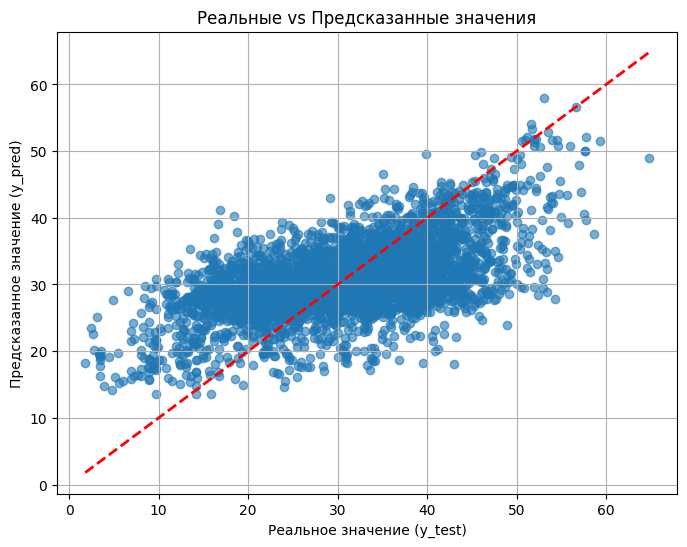

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Диагональная линия "идеального предсказания"
plt.xlabel('Реальное значение (y_test)')
plt.ylabel('Предсказанное значение (y_pred)')
plt.title('Реальные vs Предсказанные значения')
plt.grid(True)
plt.show()

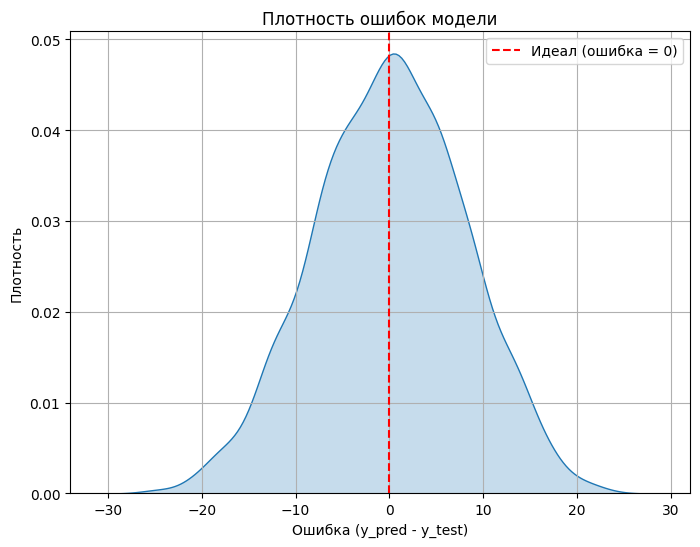

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

errors = y_pred_ensemble - y_test

plt.figure(figsize=(8, 6))
sns.kdeplot(errors, fill=True)
plt.axvline(0, color='red', linestyle='--', label='Идеал (ошибка = 0)')
plt.xlabel('Ошибка (y_pred - y_test)')
plt.ylabel('Плотность')
plt.title('Плотность ошибок модели')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import joblib
import numpy as np


joblib.dump(df_cleaned_with_embeddings['success_score'].to_numpy(), '../models/all_scores.pkl')

['../models/all_scores.pkl']